### Conditional Characterization LBNL Output
    Project:  MAExSustento
    Date:     3/1/2021

In [1]:
import pandas as pd
import numpy as np

# Import simulation data
simdat = pd.read_csv("MidPackage_RetrofitResults.csv")
# Import HVAC data
hvac = pd.read_csv("LA_HVAC_results.csv")
print('Pre-merge:','\n',simdat.shape, '\n', hvac.shape)

# Merge dataframes
merged = pd.merge(simdat, hvac, left_on="ubid", right_on="LA_bid")
print("Post-merge:","\n", merged.shape)
merged.head()

Pre-merge: 
 (486, 105) 
 (243, 5)
Post-merge: 
 (486, 110)


,building id,building name,user defined building id,ubid,building type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
0,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622814,390574910969,central chiller + boiler (VAV with reheat),1,2076.961865
1,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622814,390574910969,central chiller + boiler (VAV with reheat),1,2076.961865
2,7622813,NaN,NaN,496795871774,Multi Family House,1971,13.71,4,5214.8184,100.9181,...,NaN,NaN,NaN,NaN,NaN,7622813,496795871774,split system air conditioner+gas furnace - eac...,48,4.762106
3,7622813,NaN,NaN,496795871774,Multi Family House,1971,13.71,4,5214.8184,100.9181,...,NaN,NaN,NaN,NaN,NaN,7622813,496795871774,split system air conditioner+gas furnace - eac...,48,4.762106
4,7622824,NaN,NaN,378562887758,Large Office,1981,14.74,5,10631.4600,197.9038,...,NaN,NaN,NaN,NaN,NaN,7622824,378562887758,central chiller + boiler (VAV with reheat),1,1240.109131


In [2]:
# Define new dataframes based on baseline vs. retrofit
baseline = merged[merged['retrofit package name']=='baseline']
retrofit = merged[merged['retrofit package name']=='ECM Package 1']

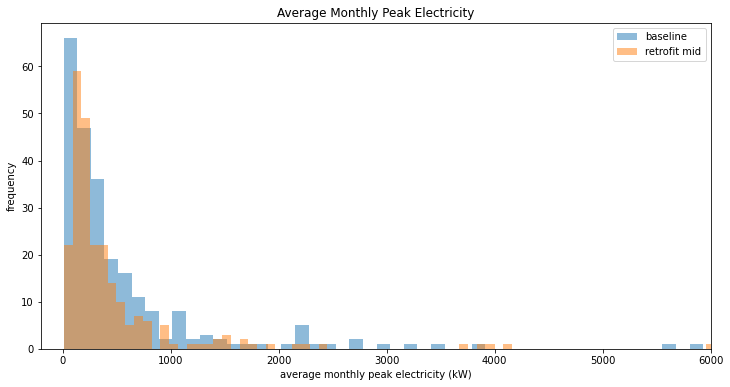

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim(-200,6000)

plt.hist(baseline['baseline average monthly peak electricity (kW)'], bins=75, alpha=0.5, label='baseline')
plt.hist(retrofit['retrofit average monthly peak electricity (kW)'], bins=75, alpha=0.5, label='retrofit mid')
plt.legend(loc='upper right')

plt.title('Average Monthly Peak Electricity')
ax.set_xlabel('average monthly peak electricity (kW)')
ax.set_ylabel('frequency')

plt.show()